<h1 align="center">CAPSTONE : DATA SCIENCE</h1>

<h1 align="center">Project 2 - Healthcare</h1>

<h3>Project Task: Week 1</h3>

<h3>Data Exploration</h3>

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#importing required algorithm libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#import data from csv file
data = pd.read_csv("health care diabetes.csv")
#all patients here are females at least 21 years old of Pima Indian heritage.

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

<h3>1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:</h3>
<ul>
    <li>Glucose</li>
    <li>BloodPressure</li>
    <li>SkinThickness</li>
    <li>Insulin</li>
    <li>BMI</li>
</ul>

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#checking all datatypes
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
#Checking for any Missing values

data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

There are no NAN values present in the data.

In [9]:
#check for 0 in required columns
(data == 0).head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,True
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,True
6,False,False,False,False,False,False,False,False,False
7,False,False,True,True,True,False,False,False,True
8,False,False,False,False,False,False,False,False,False
9,False,False,False,True,True,True,False,False,False


In [10]:
(data == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

From the above we can clearely say that the value/input 0 is present in the columns where an input is necessary i.e. the value 0 does not make sence in the columns:

<ul>
    <li>Glucose</li>
    <li>BloodPressure</li>
    <li>SkinThickness</li>
    <li>Insulin</li>
    <li>BMI</li>
</ul>

<h3>Replace 0 with NaN to make further processes easy</h3>

In [11]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [12]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<h3>Clean Data and replace NaN values with appropriately</h3>

In [13]:
#replacing all the NaN values with Mean values

In [14]:
#We can replace the NaN value with mean but we will lack precision

#data.fillna(data.mean(),inplace = True)
#data.isna().sum()

In [15]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Replacing all the NaN values with the mean value might not be the most effective way to replace Nan Values in a healthcare dataset hence we will be using KNN Imputer.

In [16]:
imputer = KNNImputer(n_neighbors=3)
data1 = imputer.fit_transform(data)

In [17]:
data1 = pd.DataFrame(data1)
data1.shape

(768, 9)

In [18]:
data1 = data1.rename(columns ={0: "Pregnancies", 1: "Glucose" , 2: "BloodPressure" , 3: "SkinThickness" , 4: "Insulin" , 5: "BMI" , 6: "DiabetesPedigreeFunction" , 7: "Age" , 8: "Outcome"})

In [19]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.563368,72.342448,29.099392,153.414063,32.426259,0.471876,33.240885,0.348958
std,3.369578,30.550074,12.221390,9.580304,100.846193,6.889295,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.333333,83.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,132.000000,32.150000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,191.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
data1.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,125.333333,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,66.666667,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,30.000000,195.000000,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
5,5.0,116.0,74.0,18.333333,109.000000,25.6,0.201,30.0,0.0
6,3.0,78.0,50.0,32.000000,88.000000,31.0,0.248,26.0,1.0
7,10.0,115.0,70.0,37.666667,145.000000,35.3,0.134,29.0,0.0
8,2.0,197.0,70.0,45.000000,543.000000,30.5,0.158,53.0,1.0
9,8.0,125.0,96.0,24.333333,191.333333,31.9,0.232,54.0,1.0


In [21]:
data1.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

<h3>2. Visually explore these variables using histograms. Treat the missing values accordingly.</h3>

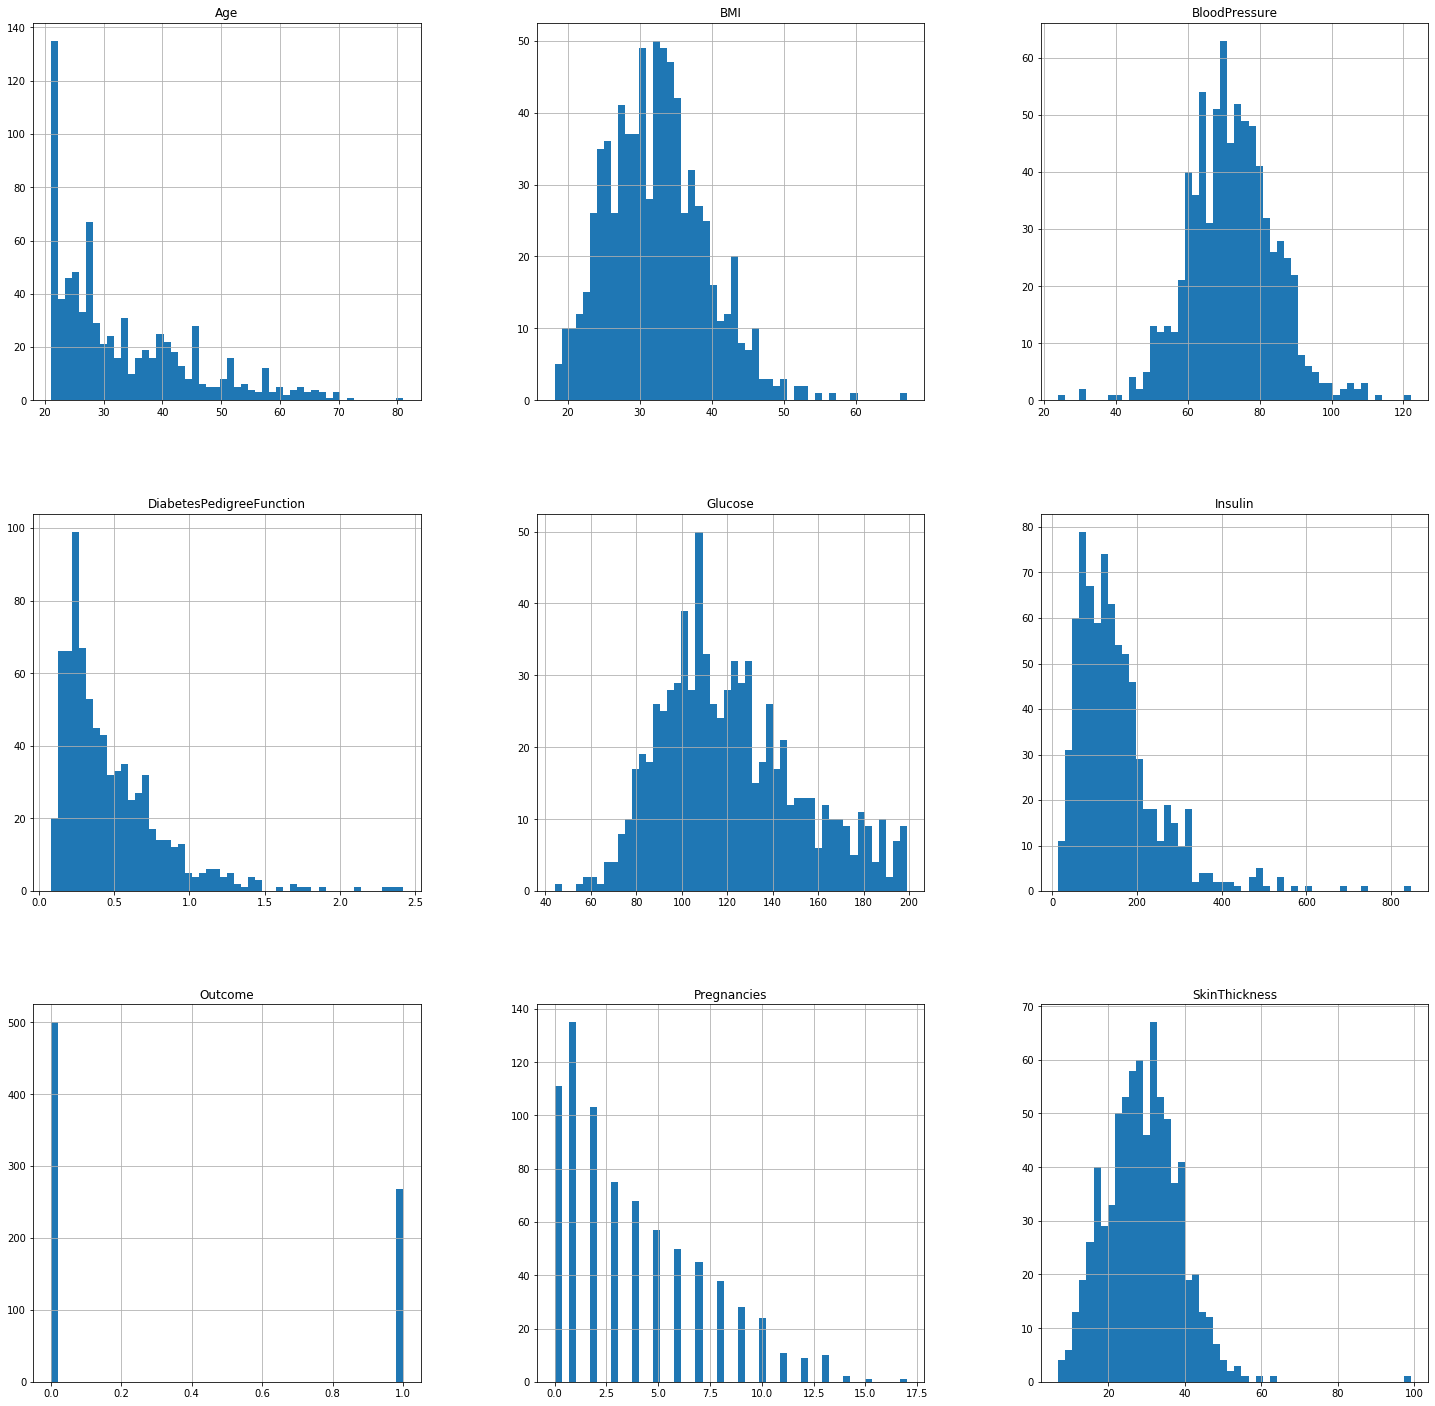

In [22]:
data1.hist(figsize=(25,25), bins=50);

From the above Histograms we can clearly see that there are outliers present.

<h3>Finding Outliers from individual colums</h3>

<!--let us compare the data with PDF and Box Plot-->
<h3>Glucose</h3>

Text(0.5, 1.0, 'Box Plot')

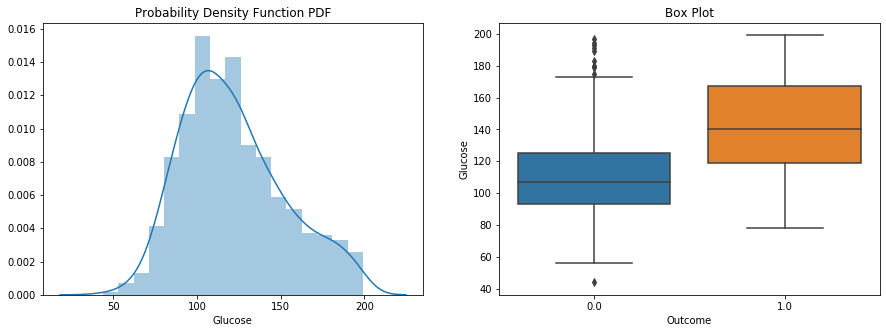

In [23]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,5))
sns.distplot(data1['Glucose'],ax = axis1).set_title('Probability Density Function PDF')
sns.boxplot (x = 'Outcome', y = 'Glucose', data = data1).set_title('Box Plot')

<h3>BloodPressure</h3>

Text(0.5, 1.0, 'Box_Plot')

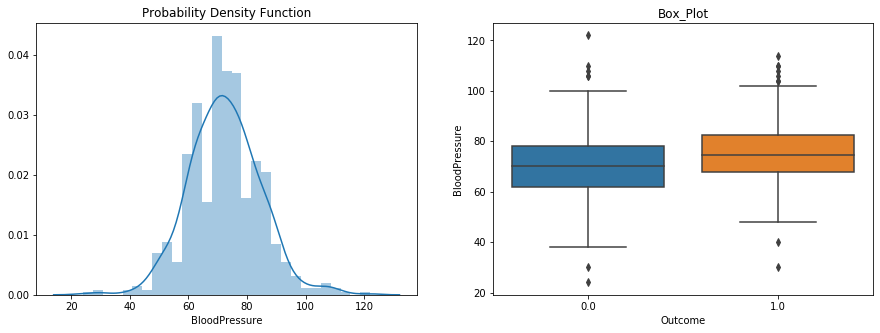

In [24]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,5))
sns.distplot(data1['BloodPressure'],ax = axis1).set_title('Probability Density Function')
sns.boxplot(x = 'Outcome',y = 'BloodPressure', data = data1).set_title('Box_Plot')

<h3>SkinThickness</h3>

Text(0.5, 1.0, 'Box Plot')

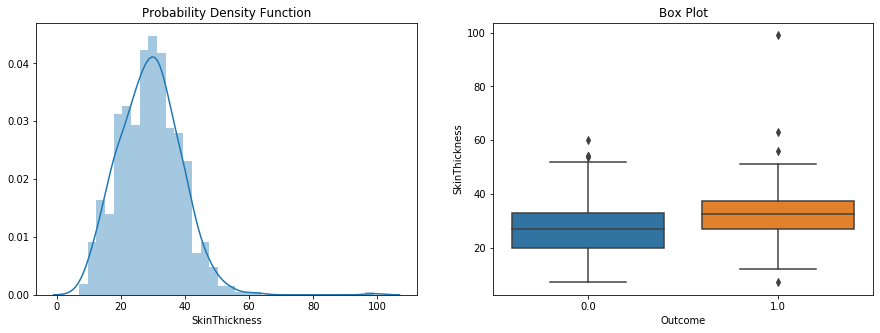

In [25]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,5))
sns.distplot(data1['SkinThickness'],ax = axis1).set_title('Probability Density Function')
sns.boxplot(x='Outcome',y='SkinThickness',data = data1).set_title('Box Plot')

<h3>Insulin</h3>

Text(0.5, 1.0, 'Box Plot')

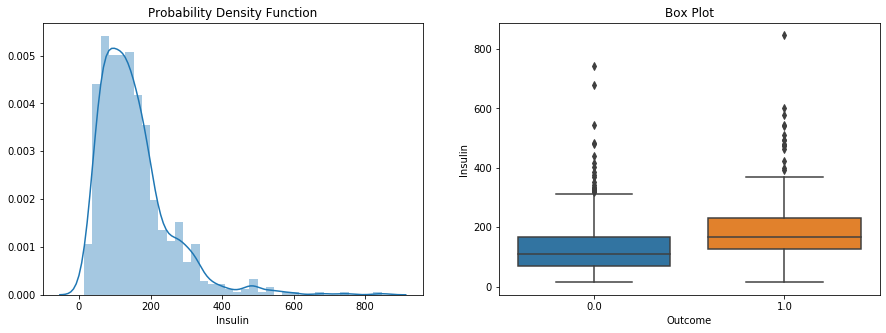

In [26]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,5))
sns.distplot(data1['Insulin'],ax = axis1).set_title('Probability Density Function')
sns.boxplot(x='Outcome',y='Insulin',data=data1).set_title('Box Plot')

<h3>Age</h3>

Text(0.5, 1.0, 'Box Plot')

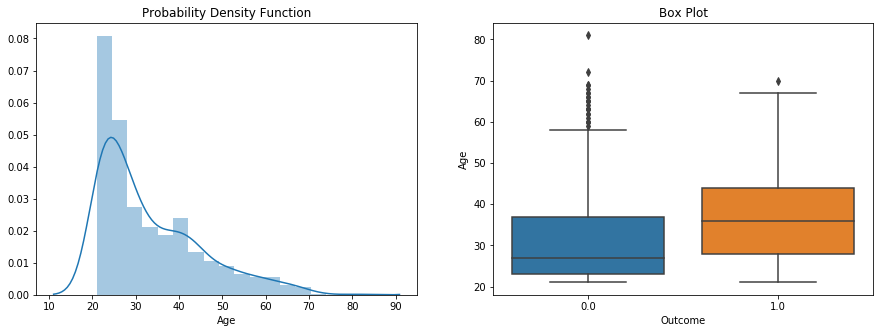

In [27]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.distplot(data1['Age'],ax = axis1).set_title('Probability Density Function')
sns.boxplot(x='Outcome',y='Age',data = data1).set_title('Box Plot')

<h3>BMI</h3>

Text(0.5, 1.0, 'Box Plot')

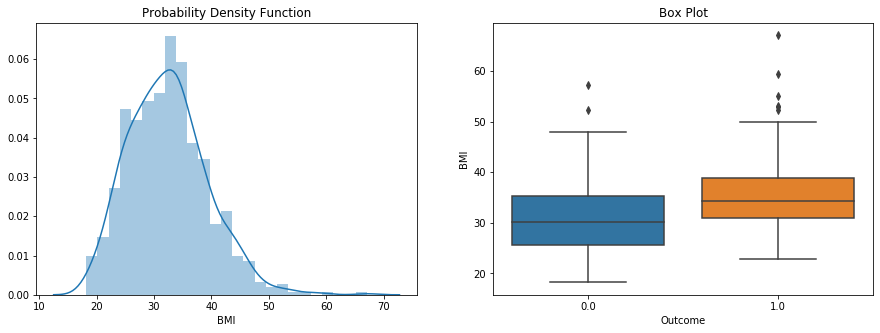

In [28]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.distplot(data1['BMI'],ax = axis1).set_title('Probability Density Function')
sns.boxplot(x='Outcome',y='BMI',data=data1).set_title('Box Plot')

<h3>Pregnancies</h3>

Text(0.5, 1.0, 'Box Plot')

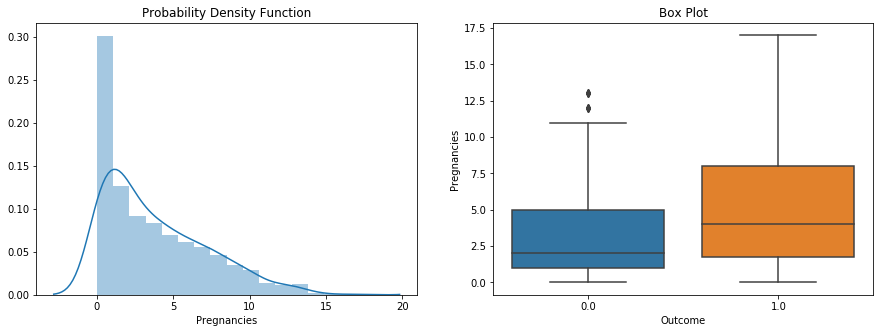

In [29]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.distplot(data1['Pregnancies'],ax = axis1).set_title('Probability Density Function')
sns.boxplot(x='Outcome',y='Pregnancies',data=data1).set_title('Box Plot')

<h3>Observations:</h3>

1. Glucose has a curve close to Normal Distribution and avg people have glucose level of 100 - 120. We also see that people with very high glucose level are more likely to have diabetes.
2. Blood Pressure also has a curve close to Normal Distribution and the avg. blood pressure is around 70-75. We can also see that blood pressure does not have a significant relation with the outcome. 
3. Insulin is Right Skewed.
4. Age is also slightly Right Skewed.Old age people are more likely to have Diabetes.
5. Chances of getting Diabetes increases as no. of pregnancies increase.

<h3>3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. </h3>

In [30]:
a=data.dtypes.value_counts()
a

float64    6
int64      3
dtype: int64

<h3>Project Task : Week 2</h3>

<h3>Data Exploration:</h3>

<h3>1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.</h3>

0.0    500
1.0    268
Name: Outcome, dtype: int64


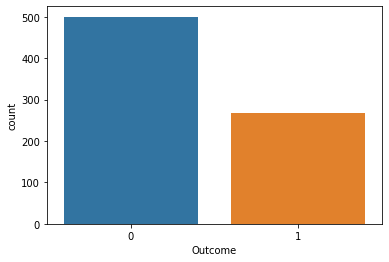

In [31]:
sns.countplot(data['Outcome'])
print(data1["Outcome"].value_counts())

<ul>
    <li>The above plot shows us the number of Diabetic and Non-Diabetic patients.</li>
    <li>0 means Diabetes was not present and 1 means Diabetes was present</li>
    <li>We can clearly see that the number of Non-Diabetic patients are almost double that of Diabetic patients</li>
</ul>

<h3>2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.</h3>

Text(0.5, 1, 'scatter plot between variables')

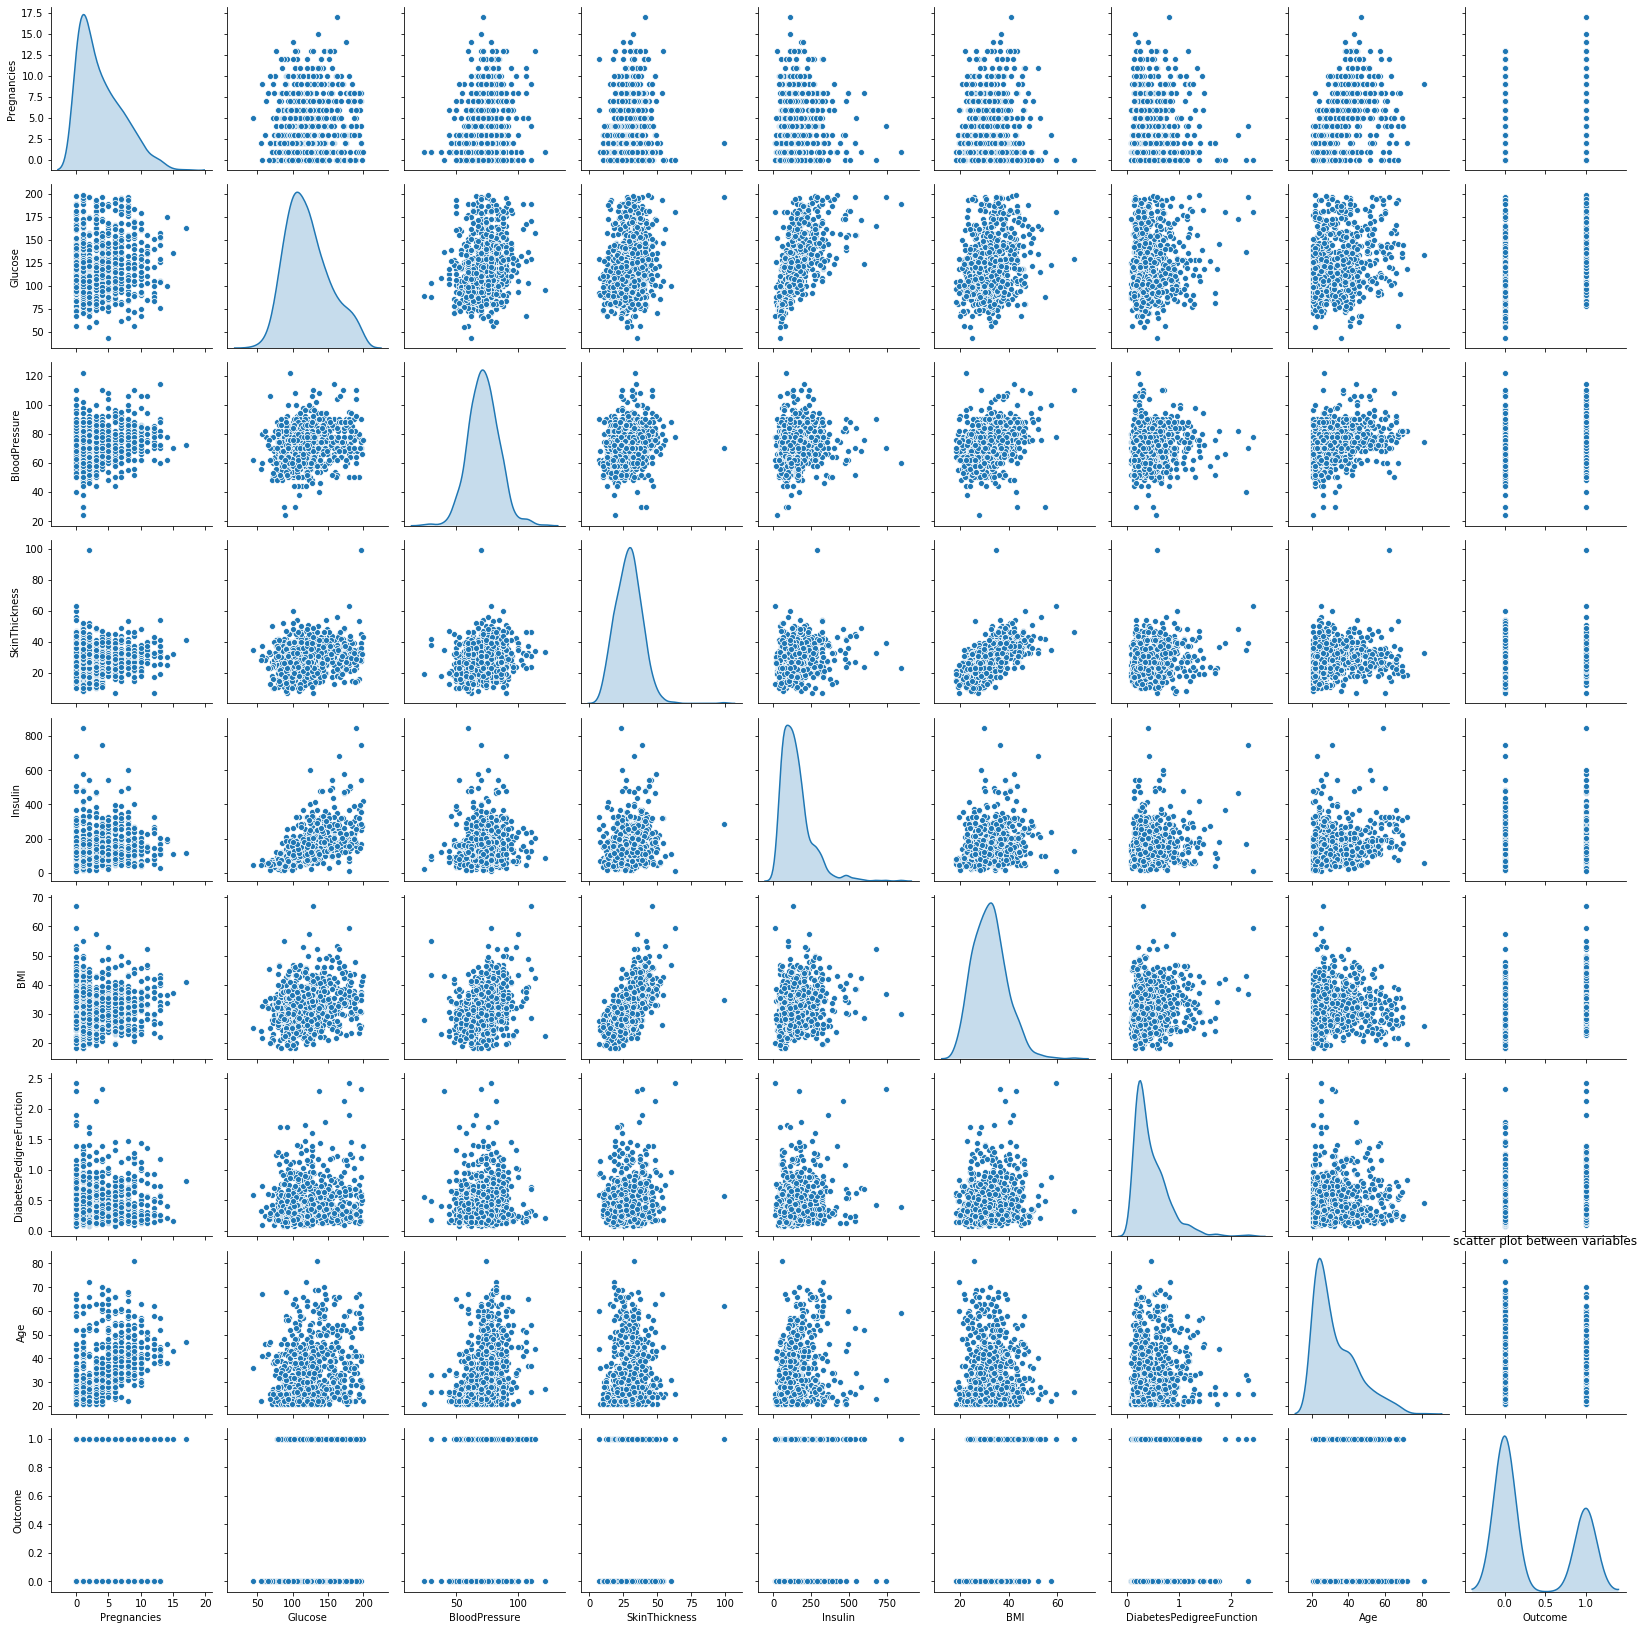

In [32]:
sns.pairplot(data1, diag_kind="kde")
plt.title('scatter plot between variables')

<ul>
    <li>No Strong Multicolinearity among features</li>
    <li>Slight Positive Correlation is present in some of the features</li>
</ul>

<h3>3. Perform correlation analysis. Visually explore it using a heat map.</h3>

In [33]:
data1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.132429,0.214150,0.110252,0.068347,0.022613,-0.033523,0.544341,0.221898
Glucose,0.132429,1.000000,0.234484,0.238568,0.606288,0.237609,0.140091,0.271275,0.496368
BloodPressure,0.214150,0.234484,1.000000,0.224489,0.126988,0.292921,0.004352,0.336553,0.174439
SkinThickness,0.110252,0.238568,0.224489,1.000000,0.222297,0.638002,0.111949,0.143450,0.274403
Insulin,0.068347,0.606288,0.126988,0.222297,1.000000,0.241546,0.144256,0.242983,0.299445
BMI,0.022613,0.237609,0.292921,0.638002,0.241546,1.000000,0.155653,0.026585,0.312493
DiabetesPedigreeFunction,-0.033523,0.140091,0.004352,0.111949,0.144256,0.155653,1.000000,0.033561,0.173844
Age,0.544341,0.271275,0.336553,0.143450,0.242983,0.026585,0.033561,1.000000,0.238356
Outcome,0.221898,0.496368,0.174439,0.274403,0.299445,0.312493,0.173844,0.238356,1.000000


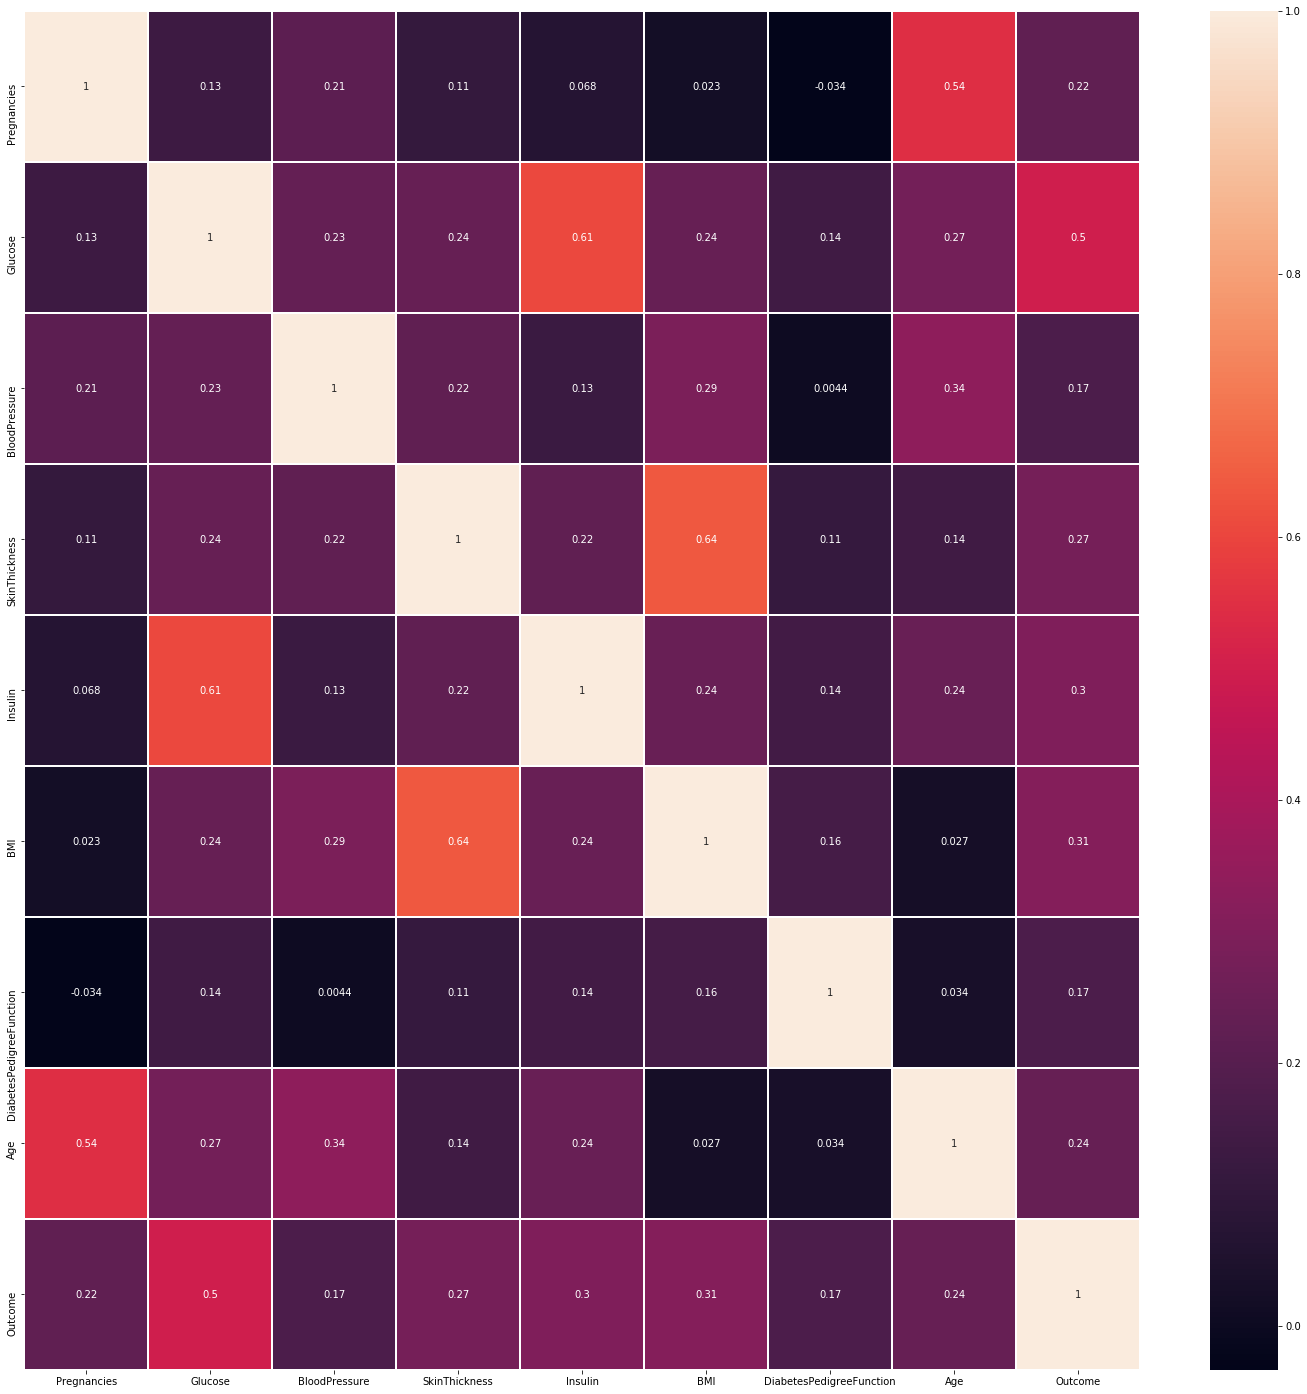

In [34]:
plt.figure(figsize=(25,25))
sns.heatmap(data1.corr(),annot=True,  linewidths=.5)

We can clearly see that  "Age & Pregnancies", "BMI & Skin Thickness", "Insulin & Glucose" have strong positive correlation.

In [35]:
#prove the above statement

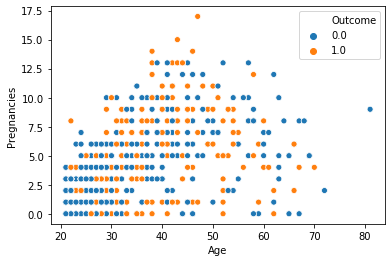

In [36]:
ap  = sns.scatterplot(x="Age", y="Pregnancies", hue="Outcome", data = data1)

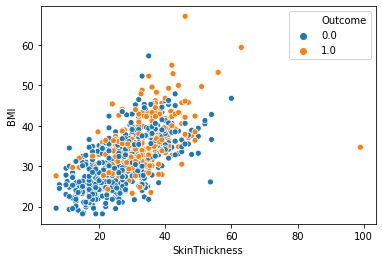

In [37]:
bs = sns.scatterplot(x="SkinThickness", y="BMI", hue="Outcome", data = data1)

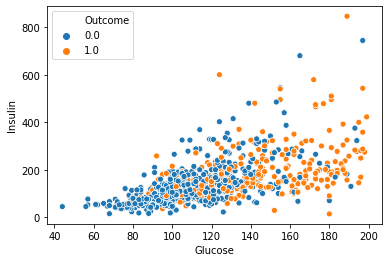

In [38]:
ig = sns.scatterplot(x="Glucose", y="Insulin", hue="Outcome", data = data1)

From the above plots we can see that:
<ul>
    <li>Age and Pregnancies are moderately correlated.</li>
    <li>As the BMI increase the skin thickness and cases of diabetese tends to increase also.</li>
    <li>As Glucose incleases most of the Insulin ranges from 0 - 500. Though the insulin ranges from 0-500 as glucose level increases chances of Diabetese also increases.</li>
</ul>

<h3>Project Task: Week 3</h3>

<h3>Data Modeling:</h3>

<h3>1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.</h3>

In [39]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.333333,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,66.666667,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,30.0,195.000000,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1.0


In [40]:
#Split the data into Train and Test Data

In [41]:
x = data1.iloc[:,:-1].values
y = data1.iloc[:,-1].values

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
print('x_train.shape: ',x_train.shape)
print('x_test.shape: ',x_test.shape)
print('y_train.shape: ',y_train.shape)
print('y_test.shape: ',y_test.shape)

x_train.shape:  (614, 8)
x_test.shape:  (154, 8)
y_train.shape:  (614,)
y_test.shape:  (154,)


<ul>
    <li>Since the given data set is a numerical one Logistic Regression would do.</li>
    <li>We have also seen that some variables are linearly dependent on the target Logistic Regression will also be good</li>
    <li>We will also be using Random Forest, Decision Tree, Support Vector Machine, Naive Bayes, KNN to check the change in accuracy</li>
    <li>We will perform Feature Scaling after using Decision Tree & Random Forest algorithms since performing feature scaling will not effect much on the result</li>
</ul>

<h3>2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.</h3>

<h3>Decision Tree</h3>

In [43]:
#Perform Decision tree classifier on training data
#predict output for test dataset using the fitted model

DecTree = DecisionTreeClassifier()
DecTree.fit(x_train,y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
DecScore = DecTree.score(x_train,y_train)
print("Decision Tree Score: ",DecScore)

dt_pred=DecTree.predict(x_test)
print("\nClassification Report:")
print(metrics.classification_report(y_test,dt_pred),'\n')

Decision Tree Score:  1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82       107
         1.0       0.59      0.57      0.58        47

    accuracy                           0.75       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.75      0.75      0.75       154
 



<h3>Random Forest</h3>

In [45]:
#Perform Random Forest on training data
#predict output for test dataset using the fitted model

RandomF = RandomForestClassifier()
RandomF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
Rscore = RandomF.score(x_train,y_train)
print('Random Forest Score: ',Rscore)

rf_pred=RandomF.predict(x_test)
print("\nClassification Report:")
print(metrics.classification_report(y_test,rf_pred),'\n')

Random Forest Score:  1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       107
         1.0       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154
 



<h3>Feature Scaling</h3>

In [47]:
scalar = StandardScaler()
x_trin_s = pd.DataFrame(scalar.fit_transform(x_train))
x_test_s = pd.DataFrame(scalar.fit_transform(x_test))

In [48]:
features = data1[["Glucose","BMI","Age","DiabetesPedigreeFunction"]]
label = data1.Outcome
features.head()

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,148.0,33.6,50.0,0.627
1,85.0,26.6,31.0,0.351
2,183.0,23.3,32.0,0.672
3,89.0,28.1,21.0,0.167
4,137.0,43.1,33.0,2.288


<h3>Support Vector Machine</h3>

In [49]:
#Perform SVM on training data
#predict output for test dataset using the fitted model

SVM = svm.SVC(kernel = "linear")
SVM.fit(x_trin_s,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
SVMs = SVM.score(x_trin_s,y_train)
print("Standard Vector Machine Score: ",SVMs)

svm_pred=SVM.predict(x_test_s)
print("\nClassification Report:")
print(metrics.classification_report(y_test,svm_pred),'\n')

Standard Vector Machine Score:  0.7736156351791531

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       107
         1.0       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154
 



<h3>Naive Bayes</h3>

In [51]:
#Perform Naive Bayes on training data
#predict output for test dataset using the fitted model

nb = naive_bayes.GaussianNB()
nb.fit(x_trin_s,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
nbs = nb.score(x_trin_s,y_train)
print("Naive-Bayes Score: ",nbs)

nb_pred=nb.predict(x_test_s)
print("\nClassification Report:")
print(metrics.classification_report(y_test,nb_pred),'\n')

Naive-Bayes Score:  0.7328990228013029

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.83       107
         1.0       0.60      0.68      0.64        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.78      0.77      0.77       154
 



<h3>Logistic Regression</h3>

In [53]:
#Perform Logistic Regression on training data
#predict output for test dataset using the fitted model

LR = LogisticRegression()
LR.fit(x_trin_s,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
LRs = LR.score(x_trin_s,y_train)
print("LogisticRegression Score: ",LRs)

lr_pred=LR.predict(x_test_s)
print("\nClassification Report:")
print(metrics.classification_report(y_test,lr_pred),'\n')

LogisticRegression Score:  0.7687296416938111

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       107
         1.0       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154
 



<h3>K Nearest Neighbor(KNN)</h3>

In [55]:
#Perform KNN on training data
#predict output for test dataset using the fitted model

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_trin_s,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [56]:
knns = knn.score(x_trin_s,y_train)
print("KNN score: ",knns,"\n")

knn_pred=knn.predict(x_test_s)
print("Classification Report:")
print(metrics.classification_report(y_test,knn_pred),'\n')

KNN score:  0.8192182410423453 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       107
         1.0       0.62      0.38      0.47        47

    accuracy                           0.74       154
   macro avg       0.69      0.64      0.65       154
weighted avg       0.72      0.74      0.72       154
 



 <ul>
    <li>Decision Tree and Random Forest has the heighest accuracy.</li>
    <li>SVM has heigher accuracy than Linear Regression and Naive Bayes.</li>
    <li>Naive Bayes has a heigher accuracy than Linear Regression.</li>
    <li>Comparing all the algorithms used with KNN we can see that KNN has heigher accuracy than SVM, Naive Bayes and Linear Regression.</li>
</ul>

<h3>Project Task: Week 4 </h3>

<h3>Data Modeling:</h3>

<h3>1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.</h3>

<ul>
    <li>ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no).</li>
    <li>Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two.</li>
</ul>

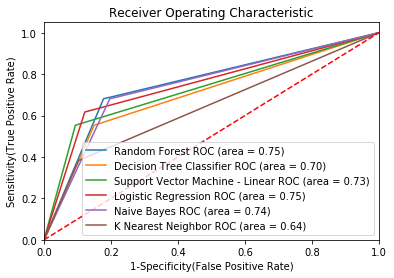

In [57]:
plt.figure()

models = [
    {
        'label': 'Random Forest',
        'model': RandomForestClassifier()
    },
    {
        'label': 'Decision Tree Classifier',
        'model': DecisionTreeClassifier()
    },
    {
        'label': 'Support Vector Machine - Linear',
        'model': svm.SVC(kernel="linear")
    },
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression()
    },
    {
        'label': 'Naive Bayes',
        'model': naive_bayes.GaussianNB()
    },
    {
        'label': 'K Nearest Neighbor',
        'model': KNeighborsClassifier(n_neighbors=2)
    }
]


#Loop iterates through the model  list

for mod in models:
    model = mod['model']
    model.fit(x_trin_s, y_train)
    y_pred = model.predict(x_test_s)
    
# Compute False postive rate, and True positive rate

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    
# Calculate Area under the curve to display on the plot

    auc = metrics.roc_auc_score(y_test,model.predict(x_test_s))
    
# Now, plot the computed values

    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (mod['label'], auc))
    
# Custom settings for the plot 

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

From the above graph we can see that Random Forest ROC has the best Score.

<h3>Data Reporting:</h3>

<h3>2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:</h3>

<ol>
        <li>Pie chart to describe the diabetic or non-diabetic population</li>
        <li>Scatter charts between relevant variables to analyze the relationships</li>
        <li>Histogram or frequency charts to analyze the distribution of the data</li>
        <li>Heatmap of correlation analysis among the relevant variables</li>
        <li>Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.</li>
</ol>

Tableau Public Link: https://public.tableau.com/shared/5B43H49H8?:display_count=y&:origin=viz_share_link

<h3 align="center">********** THE END **********</h3>